# Prophet section


## module imports

In [56]:
import os
import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb 
from pylab import rcParams
import scipy
from scipy.stats import pearsonr

from prophet import Prophet
import json
from prophet.plot import plot_plotly, plot_components_plotly

from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
#                                       \/
#                   The Augmented Dickey-Fuller test can be used to test 
#                   whether a given time series is stationary or not
from sklearn.metrics import mean_squared_error
from tqdm import tqdm_notebook
#                    \/
#       responsible for displaying the progress bar
from itertools import product

import warnings
warnings.filterwarnings('ignore')
%matplotlib widget

In [57]:
plt.rcParams['figure.figsize'] = [10,10]

## calling the csv data

In [58]:
precip1 = pd.read_csv('/Users/stephenshaeffer/Desktop/TXT-CSV/precipitation_station1.csv')
precip1.head()

,y,ds
0,0.0,2023-04-12
1,0.0,2023-04-12
2,0.0,2023-04-12
3,0.0,2023-04-12
4,0.0,2023-04-12


## defining the "m" method

In [59]:
m = Prophet()
m.fit(precip1)

10:50:03 - cmdstanpy - INFO - Chain [1] start processing
10:50:04 - cmdstanpy - INFO - Chain [1] done processing


## defining prediction dataframes

In [60]:
precipDayfuture = m.make_future_dataframe(periods=1)
precipDayfuture.tail()

,ds
13,2023-04-09
14,2023-04-10
15,2023-04-11
16,2023-04-12
17,2023-04-13


In [61]:
precipWeekfuture = m.make_future_dataframe(periods=7)
precipWeekfuture.tail()

,ds
19,2023-04-15
20,2023-04-16
21,2023-04-17
22,2023-04-18
23,2023-04-19


In [62]:
precip2Weekfuture = m.make_future_dataframe(periods=14)
precip2Weekfuture

,ds
0,2023-03-27
1,2023-03-28
2,2023-03-29
3,2023-03-30
4,2023-03-31
5,2023-04-01
6,2023-04-02
7,2023-04-03
8,2023-04-04
9,2023-04-05


## utilizing the prediction data frames with the "predict" method

In [63]:
precipDayforecast = m.predict(precipDayfuture)
precipDayforecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2023-03-27,0.000558,-0.002997,0.004008
1,2023-03-28,0.000053,-0.003443,0.003265
2,2023-03-29,-0.000194,-0.003742,0.003099
3,2023-03-30,0.000711,-0.002662,0.003940
4,2023-03-31,-0.000065,-0.003270,0.003241
5,2023-04-01,-0.000125,-0.003474,0.003291
6,2023-04-02,-0.000073,-0.003433,0.003560
7,2023-04-03,-0.000009,-0.003396,0.003247
8,2023-04-04,0.000093,-0.003362,0.003677
9,2023-04-05,0.000873,-0.002790,0.004239


In [64]:
precipWeekforecast = m.predict(precipWeekfuture)
precipWeekforecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2023-03-27,0.000558,-0.002746,0.004155
1,2023-03-28,0.000053,-0.003348,0.003666
2,2023-03-29,-0.000194,-0.003584,0.003067
3,2023-03-30,0.000711,-0.002593,0.004180
4,2023-03-31,-0.000065,-0.003670,0.003207
5,2023-04-01,-0.000125,-0.003463,0.003315
6,2023-04-02,-0.000073,-0.003623,0.003136
7,2023-04-03,-0.000009,-0.003430,0.003653
8,2023-04-04,0.000093,-0.003527,0.003613
9,2023-04-05,0.000873,-0.002819,0.004148


In [65]:
precip2Weekforecast = m.predict(precip2Weekfuture)
precip2Weekforecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2023-03-27,0.000558,-0.002752,0.003901
1,2023-03-28,0.000053,-0.003421,0.003566
2,2023-03-29,-0.000194,-0.003707,0.003004
3,2023-03-30,0.000711,-0.002667,0.004037
4,2023-03-31,-0.000065,-0.003284,0.003491
5,2023-04-01,-0.000125,-0.003552,0.003423
6,2023-04-02,-0.000073,-0.003427,0.003500
7,2023-04-03,-0.000009,-0.003214,0.003325
8,2023-04-04,0.000093,-0.003484,0.003522
9,2023-04-05,0.000873,-0.002612,0.004228


## plotting the 24 hour forcasting

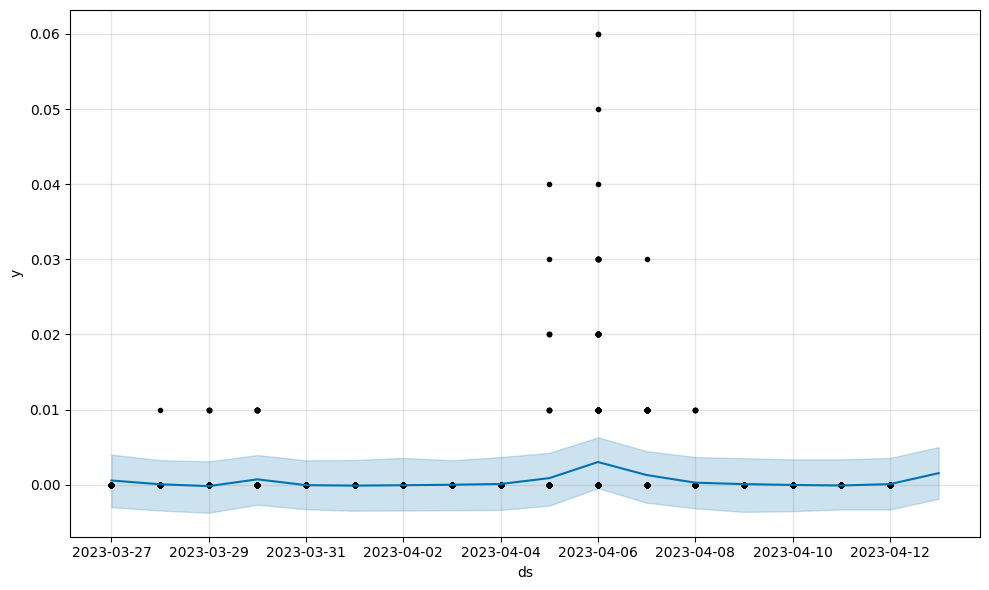

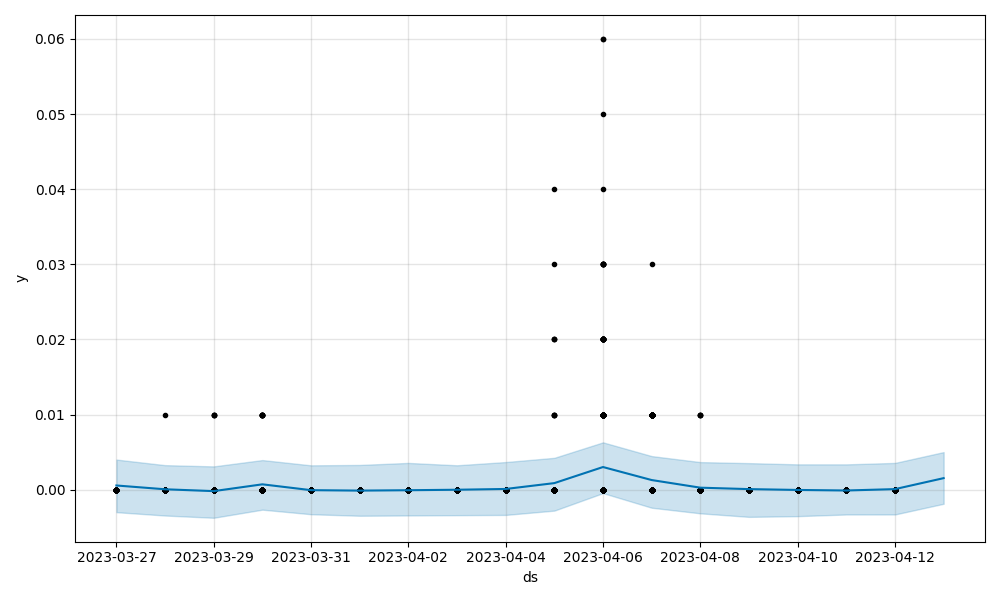

In [66]:
# forcast 1
m.plot(precipDayforecast)

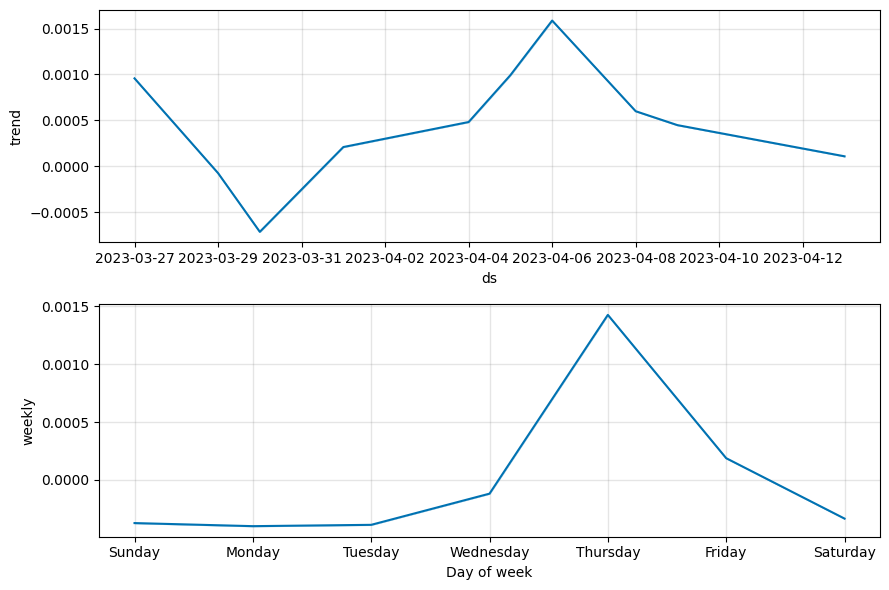

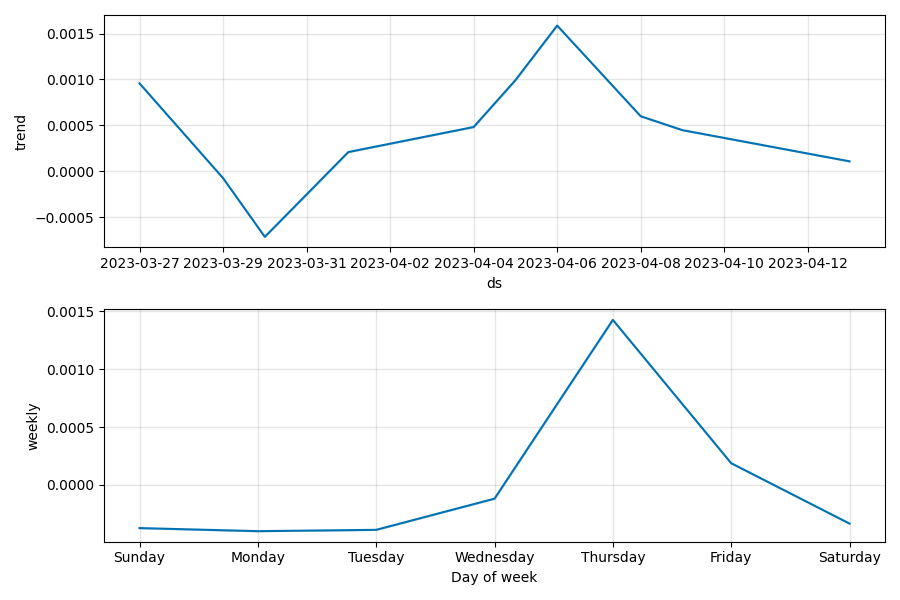

In [67]:
# forcast 2
m.plot_components(precipDayforecast)
# print(graph_1)

In [68]:
# forcast 3
plot_plotly(m, precipDayforecast)

In [69]:
# forcast 4
plot_components_plotly(m, precipDayforecast)

## plotting the weekly forcasting


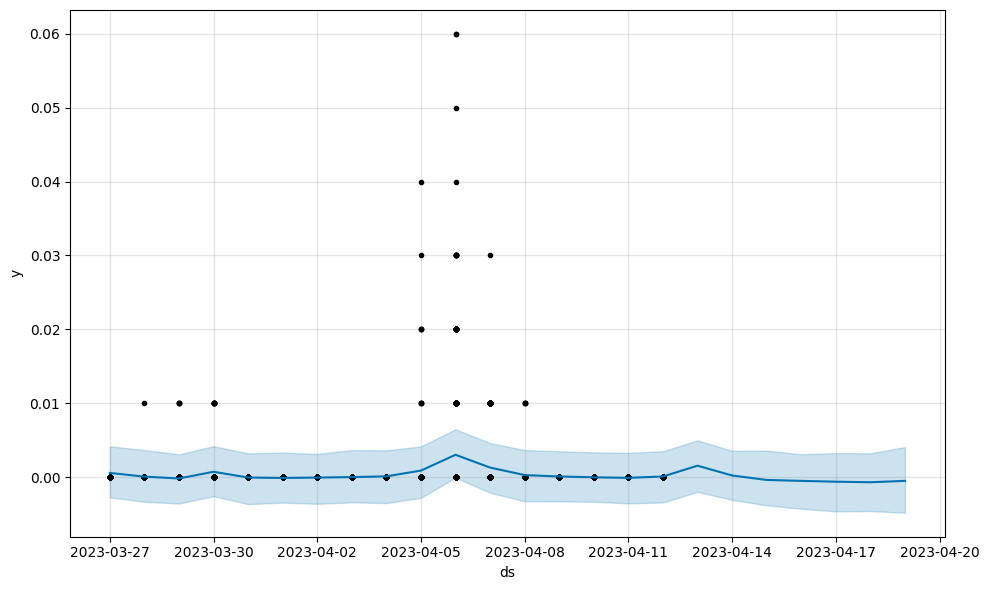

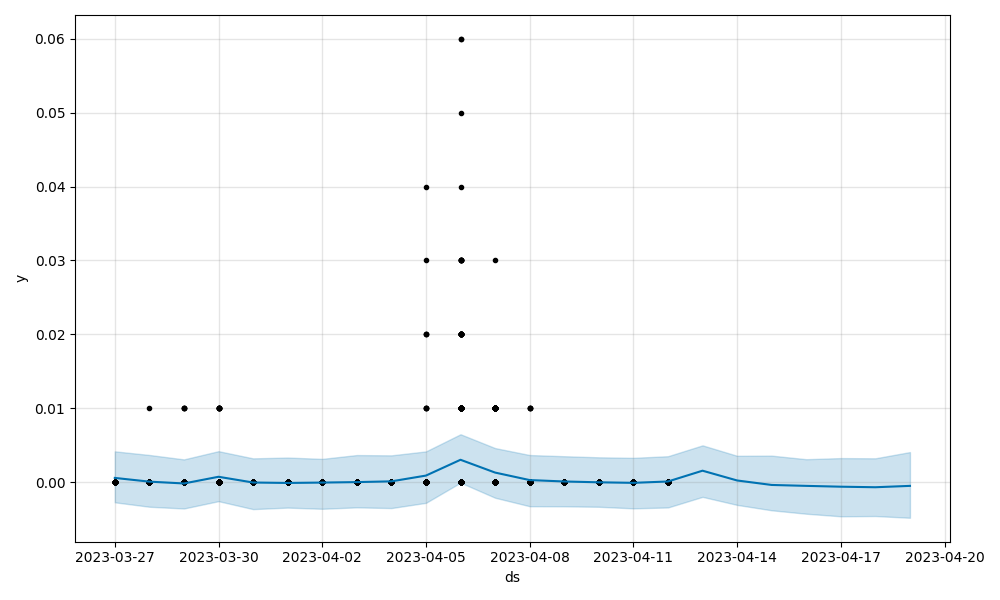

In [70]:
# forcast 1
m.plot(precipWeekforecast)    

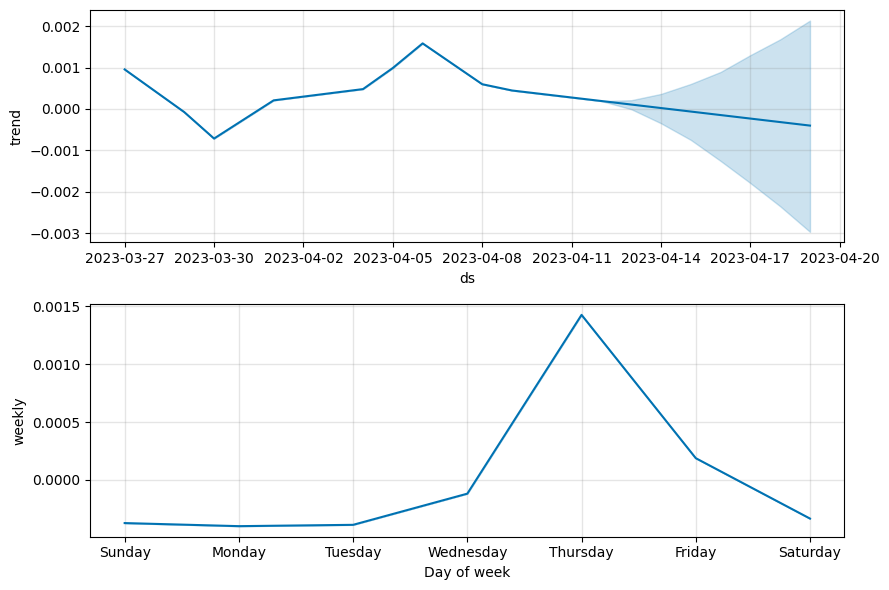

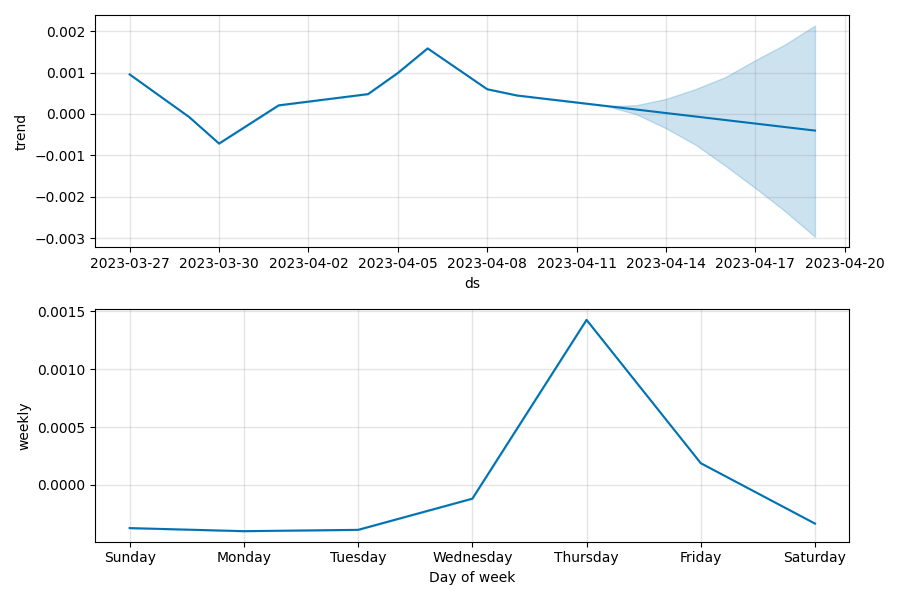

In [71]:
# forcast 2
m.plot_components(precipWeekforecast)

In [72]:
# forcast 3
plot_plotly(m, precipWeekforecast)

In [73]:
# forcast 4
plot_components_plotly(m, precipWeekforecast)

## plotting the 2 week forcasting


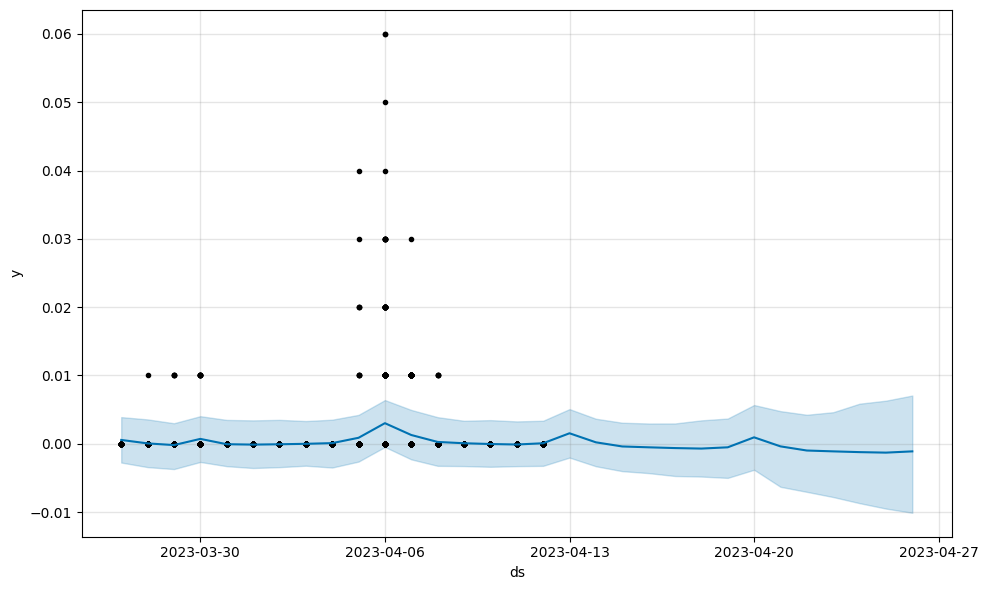

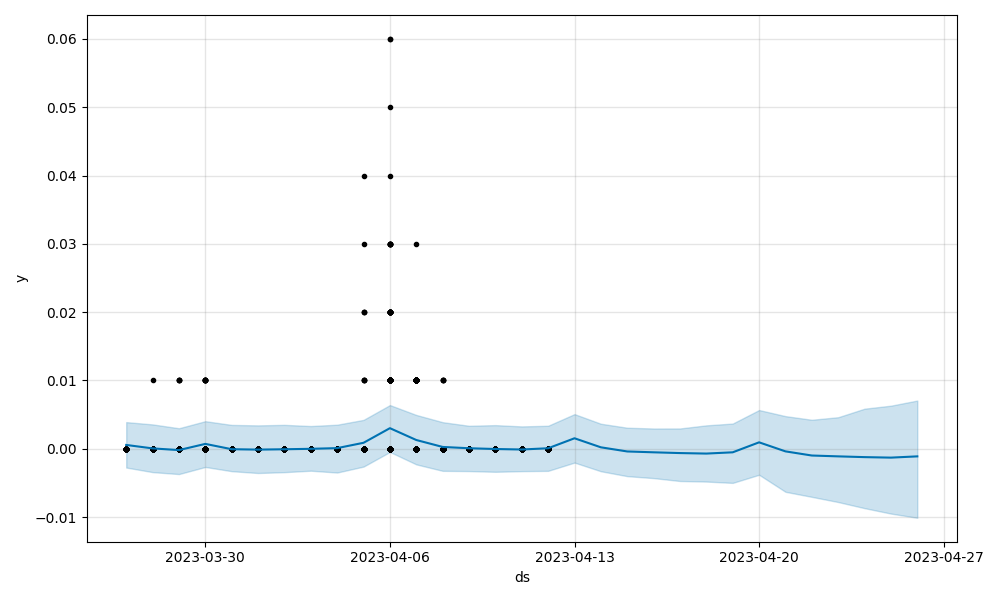

In [74]:
# forcast 1
m.plot(precip2Weekforecast)

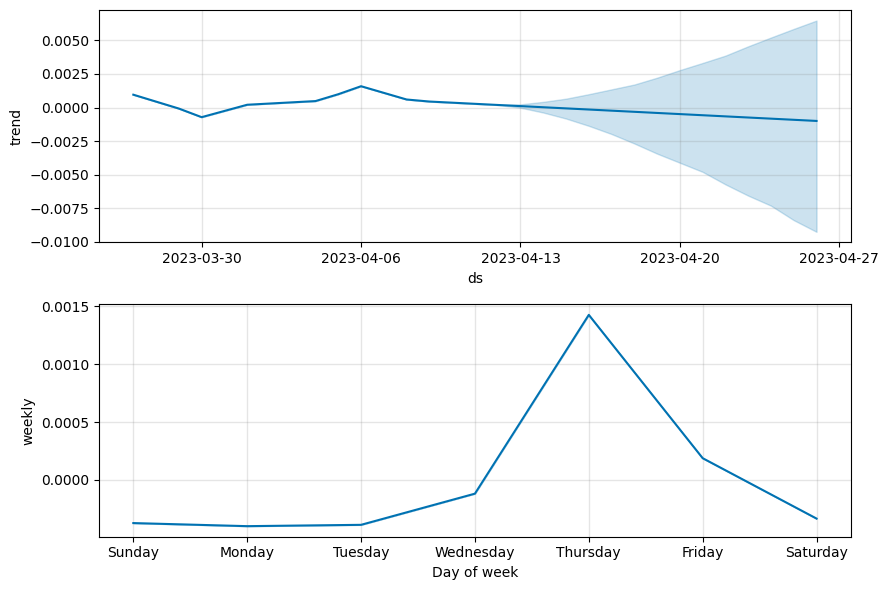

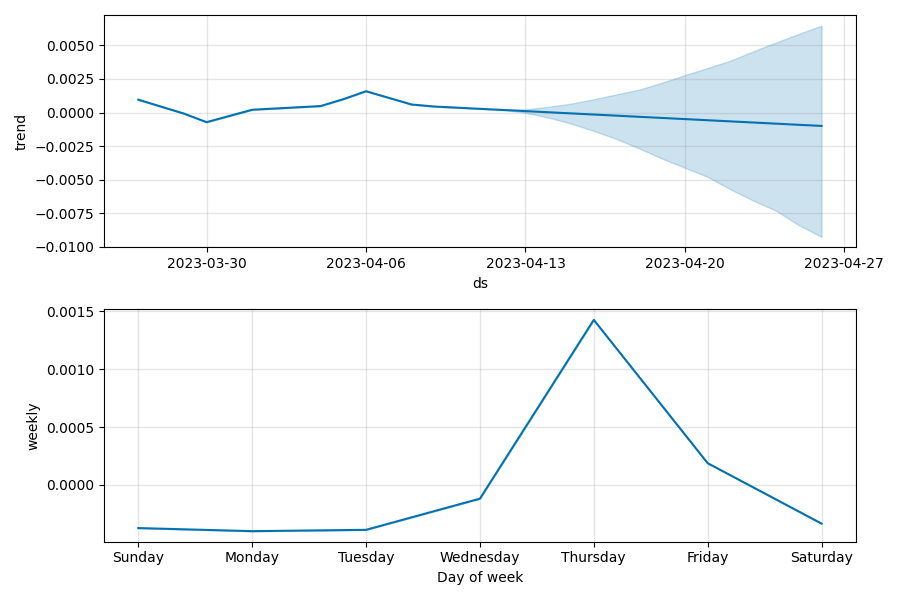

In [75]:
# forcast 2
m.plot_components(precip2Weekforecast)

In [76]:
# forcast 3
plot_plotly(m, precip2Weekforecast)

In [77]:
# forcast 4
plot_components_plotly(m, precip2Weekforecast)

# ARIMA section


## plotting the data

In [78]:
plt.plot(precip1['ds'], precip1['y'])
plt.ylabel('Precipitation')
plt.xlabel('Date')
plt.xticks(rotation=30)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

## testing for stationary

In [79]:
"""
testing for unit root with ACF

"""
def stationarity_test1():
# a1 and c1 are for the ranges of p that should be acceptable
    a1 = 0.001
    a2 = 0.01
    b1 = 0.05
    b2 = 0.001
    c1 = 0.10

    ad_fuller_result = adfuller(precip1['y'])

    p = (ad_fuller_result[1])
    
    ADF1 = (ad_fuller_result[0])
    p1 = (ad_fuller_result[1])

    precip1['log_diff'] = np.log(precip1['y']) # taking that log of the data 
    precip1['log_diff'] = precip1['log_diff'].diff() # taking the difference of the log data
    ad_fuller_result2 = adfuller(precip1['log_diff'][1:])

    ADF2 = (ad_fuller_result2[0])
    p2 = (ad_fuller_result2[1])

    if ((ADF2 and p2) < (ADF1 and p1)) and ((p2 < a1) or (a1 < p2 < a2) or (b1 < p2 < b2)):
        print('this is stationary\n ADF                p-value')
        return ADF2, p2
    elif (ADF2 and p2) > (ADF1 and p1) and ((p1 < a1) or (a1 < p1 < a2) or (b1 < p1 < b2)):
        print('this is stationary\n ADF                p-value')
        return ADF2, p2

stationarity_test1()

MissingDataError: exog contains inf or nans

## determining best parameters with AIC and the fitting then best model

In [ ]:
"""
AR: order of 0-10
I: equals 1 (since we only difference once)
MA: order of 0-10
"""
def optimize_ARIMA(endog, order_list):
    """
        Return dataframe with parameters and corresponding AIC (Akaike Information Criterion)
                                                            ^
                                            This is an estimator of prediction error
        order_list - list with (p, d, q) tuples
        endog - the observed variable
    """
    
    results = []
    
    for order in tqdm_notebook(order_list):
        try: 
            model = SARIMAX(endog, order=order, simple_differencing=False).fit(disp=False)
        except:
            continue
            
        aic = model.aic
        results.append([order, model.aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p, d, q)', 'AIC']
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [ ]:
ps = range(0, 10, 1)
d = 1
qs = range(0, 10, 1)

# Create a list with all possible combination of parameters
parameters = product(ps, qs)
parameters_list = list(parameters)

order_list = []

for each in parameters_list:
    each = list(each)
    each.insert(1, 1)
    each = tuple(each)
    order_list.append(each)

In [ ]:
result_df = optimize_ARIMA(precip1['y'], order_list)
result_df

In [ ]:
"""
fitting the best (p, d, q) Seasonal Auto Regressive Integrated Moving Average 
"""
best_model1 = SARIMAX(precip1['y'], order=(3, 1, 6), simple_differencing=False)
#                                                           ^
#                             Whether or not to use partially conditional maximum likelihood estimation
res = best_model1.fit(disp=False)
print(res.summary())

In [ ]:
res.plot_diagnostics();

## evaluating forecasting results of the model

In [ ]:
"""
forecasting a predicted mean value
"""
n_forecast = 1000
predict = res.get_prediction(end=best_model1.nobs + n_forecast)
#                                            /\
#                           this means number of observations 
idx1 = np.arange(len(predict.predicted_mean))

fig, ax = plt.subplots()
ax.plot(precip1['y'], 'blue')
ax.plot(idx1[-n_forecast:], predict.predicted_mean[-n_forecast:], 'y--')

ax.set(title = 'Precipitation Forecast 1')
plt.show()

In [ ]:
precip1['model'] = predict.predicted_mean
precip1

## taking into account mean squared error value for the model

In [ ]:
mse = mean_squared_error(precip1['y'], precip1['model'])
print(f'MSE: {mse}')

# SARIMA section

## testing for stationary

In [ ]:
"""
data_tr_2 is the seasonal difference
data_tr_1 is the log difference 
"""
precip1['seasonal_diff'] = precip1['log_diff'][1:].diff(1)
precip1.head(20)

In [ ]:
def stationarity_test2():
    
    a1 = 0.001
    a2 = 0.01
    b1 = 0.05
    b2 = 0.001
    c1 = 0.10

    ad_fuller_result = adfuller(precip1['y'])

    p = (ad_fuller_result[1])
    
    ADF1 = (ad_fuller_result[0])
    p1 = (ad_fuller_result[1])

    precip1['seasonal_diff'] = np.log(precip1['y']) # taking that log of the data 
    precip1['seasonal_diff'] = precip1['seasonal_diff'].diff() # taking the difference of the log data
    ad_fuller_result2 = adfuller(precip1['seasonal_diff'][2:])

    ADF2 = (ad_fuller_result2[0])
    p2 = (ad_fuller_result2[1])

    if ((ADF2 and p2) < (ADF1 and p1)) and ((p2 < a1) or (a1 < p2 < a2) or (b1 < p2 < b2)):
        print('this is stationary\n ADF                p-value')
        return ADF2, p2
    elif (ADF1 and p1) > (ADF1 and p1) and ((p1 < a1) or (a1 < p1 < a2) or (b1 < p1 < b2)):
        print('this is stationary\n ADF                p-value')
        return ADF1, p1

stationarity_test2()

In [ ]:
""" the middle value for the range is 2 because it is representing 1/5th of the data (to save computation time) """
p = range(0,2,1)
d = 1
q = range(0,2,1)
P = range(0,2,1)
D = 1
Q = range(0,2,1)
s = 4

parameters = product(p, q, P, Q)
parameters_list = list(parameters)

print(len(parameters_list))
print(parameters_list[:5])

In [ ]:
#                                                         order of differencing 
#                                                         |
#                                                         | seasonal order of differencing
#                                                         |  |  
#                                                         |  |  length of the season
#                                                         |  |  |
#                                                        \/ \/ \/
result_df = optimize_SARIMA(precip1['y'], parameters_list, 1, 1, 2)
result_df

## fitting the best model fit with SARIMAX 

In [ ]:
best_model2 = SARIMAX(precip1['y'], order=(2,1,3), seasonal_order=(0,1,0,4), simple_differencing=False)
res = best_model2.fit(disp=False)

print(res.summary())

In [ ]:
res.plot_diagnostics();

In [ ]:
n_forecast = 1000
predict = res.get_prediction(end=best_model2.nobs + n_forecast)
idx = np.arange(len(predict.predicted_mean))

fig, ax = plt.subplots()
ax.plot(precip1['y'], 'blue')
ax.plot(idx[-n_forecast:], predict.predicted_mean[-n_forecast:], 'g--')

ax.set(title='Precipitation Forcast')
plt.show()

In [ ]:
precip1['model2'] = predict.predicted_mean
precip1

## taking into account mean squared error value for the model

In [ ]:
mse = mean_squared_error(precip1['y'], precip1['model2'])
print(f'MSE: {mse}')

# ARIMA and SARIMA comparison

In [ ]:
plt.plot(precip1['y'], color='blue', label='actual')
plt.plot(precip1['model'], color='red', label='model')
plt.plot(precip1['model2'], color='green', label='model2')
plt.legend(loc='best')
plt.title('comparison of ARIMA and SARIMA model to actual')
plt.show()